# Clase 1: Mercado de Renta Fija - Tasas de Interés y Estructura Temporal

---

## **1. Tipos de Tasas de Interés**

**Objetivo:** Diferenciar entre tasas de interés simple, compuesta y continua

---

### a) Fórmulas Básicas

**Tasa Simple:**  

$$ VF = VP × (1 + r × t)$$

*Donde:*  
- $VF$ = Valor Futuro  
- $VP$ = Valor Presente  
- $r$ = Tasa de interés  
- $t$ = Tiempo  

**Tasa Compuesta:**  
$$VF = VP × (1 + r)^t$$

**Tasa Continua:**  
$$VF = VP × e^{r × t}$$  

**Tasa Continua:**  
$$
VF = VP \times e^{r \times t}
$$

### Capitalización Continua

La capitalización continua constituye el límite matemático del interés compuesto cuando el número de períodos de capitalización tiende a infinito $(n \rightarrow \infty$). Este concepto se fundamenta en el límite de Euler:

$$
\lim_{n \to \infty} \left(1 + \frac{x}{n}\right)^n = e^x
$$

Aplicando este límite a la fórmula del interés compuesto, obtenemos:

$$
\lim_{n \to \infty} P \left(1 + \frac{r}{n}\right)^{n t} = P \lim_{n \to \infty} \left[\left(1 + \frac{r}{n}\right)^n\right]^t = P (e^r)^t = P e^{r t}
$$

Por tanto, la fórmula para la capitalización continua es:

$$
A = P \, e^{r t}
$$

donde:
- **$P$** es el capital inicial.
- **$r$** es la tasa de interés expresada en términos continuos.
- **$t$** es el tiempo en años.
- **$e$** es la base de los logaritmos naturales (aproximadamente 2.71828).

La capitalización continua es especialmente relevante en modelos financieros avanzados, valoración de derivados y en el cálculo de tasas forward implícitas en la estructura temporal de tipos de interés.

A continuación, se muestra un ejemplo en Python que utiliza un método numérico iterativo para calcular el límite de la capitalización continua.


In [23]:
import math

def continuous_compounding(P, r, t, tol=1e-10, max_iter=1000):
    """
    Calcula numéricamente el límite de la capitalización compuesta cuando n -> ∞.
    Se utiliza un método iterativo duplicando n hasta que la diferencia entre iteraciones
    sea menor que la tolerancia 'tol'.

    Parámetros:
        P (float): Capital inicial.
        r (float): Tasa de interés en términos continuos.
        t (float): Tiempo en años.
        tol (float): Tolerancia para la convergencia.
        max_iter (int): Número máximo de iteraciones.

    Retorna:
        (float, int): Valor calculado y el número de subdivisiones (n) utilizado.
    """
    n = 1
    A_prev = P * (1 + r/n)**(n*t)
    
    for i in range(max_iter):
        n *= 2
        A_curr = P * (1 + r/n)**(n*t)
        if abs(A_curr - A_prev) < tol:
            return A_curr, n
        A_prev = A_curr
    
    # En caso de no converger dentro de max_iter
    return A_curr, n

# Ejemplo de uso:
P = 1        # Capital inicial
r = 1        # Tasa de interés del 5%
t = 1           # Tiempo de 5 años

valor_limite, n_usado = continuous_compounding(P, r, t)
valor_continuo = P * math.exp(r * t)

print(f"Valor calculado numéricamente: A = {valor_limite:.6f} (n = {n_usado})")
print(f"Valor por capitalización continua: A = {valor_continuo:.6f}")


Valor calculado numéricamente: A = 2.718282 (n = 17179869184)
Valor por capitalización continua: A = 2.718282


In [7]:
import numpy as np

vp = 1000  # Valor presente
t = 2      # Período en años
r = 0.05   # Tasa anual

# Cálculos
simple = vp * (1 + r * t)
compuesto = vp * (1 + r)**t
continuo = vp * np.exp(r * t)

print(f"Tasa Simple: ${simple:.2f}")
print(f"Tasa Compuesta: ${compuesto:.2f}")
print(f"Tasa Continua: ${continuo:.2f}")

Tasa Simple: $1100.00
Tasa Compuesta: $1102.50
Tasa Continua: $1105.17


In [ ]:
vp = 1000  # Valor presente
t = 2      # Período en años
r = 0.05   # Tasa anual

# Cálculos
simple = vp * (1 + r * t)
compuesto = vp * (1 + r)**t
continuo = vp * np.exp(r * t)

print(f"Tasa Simple: ${simple:.2f}")
print(f"Tasa Compuesta: ${compuesto:.2f}")
print(f"Tasa Continua: ${continuo:.2f}")

Tasa Simple: $1100.00
Tasa Compuesta: $1102.50
Tasa Continua: $1105.17


---

## **2. Tasas Spot vs Forward**

---

**Definiciones:**  

**Tasa Spot:** Tasa para inversión que comienza hoy hasta plazo $t$. Ejemplo la tasa de hoy para un plazo de 1 año. ($t_1$)

**Tasa Forward:** Tasa pactada hoy para un período futuro $t_1$, para un plazo de $t_2$. Ejemplo $[t_1=1, t_2=1]$ Significa que se pacta hoy la tasa con plazo de 1 año ($t_2$), para 1 año más en el futuro ($t_1$).


### Calculo de Tasas Forward

Para interpretar las tasas spot como tasas forward que inician en 0, se considera que la tasa spot para un período de $ n $ años, denotada como $ r_{0,n} $, es equivalente a la tasa forward para el período [0, n]. Es decir:

$$
f_{0,n} = r_{0,n}
$$

La relación general entre tasas spot y tasas forward se expresa de la siguiente manera:

$$
(1 + r_{0,n})^n = (1 + r_{0,m})^m \times (1 + f_{m,n})^{n-m}
$$

donde:
- **$ r_{0,n} $**: Tasa spot para el período desde 0 hasta $ n $ años.
- **$ r_{0,m} $**: Tasa spot para el período desde 0 hasta $ m $ años, con $ m < n $.
- **$ f_{m,n} $**: Tasa forward para el período comprendido entre $ m $ y $ n $ años.

Si se toma $ m = 0 $, la ecuación se transforma en:

$$
(1 + r_{0,n})^n = (1 + r_{0,0})^0 \times (1 + f_{0,n})^{n}
$$

Dado que $ (1 + r_{0,0})^0 = 1 $, se tiene:

$$
(1 + r_{0,n})^n = (1 + f_{0,n})^n
$$

Por lo tanto:

$$
f_{0,n} = r_{0,n}
$$


Demostración: 
A continuación, se presenta la demostración paso a paso para despejar la tasa forward $ f_{m,n} $ a partir de la ecuación:

$$
(1 + r_{0,n})^n = (1 + r_{0,m})^m \times (1 + f_{m,n})^{n-m}
$$

#### Paso 1: Dividir entre $(1 + r_{0,m})^m$
Dividimos ambos lados de la ecuación por $(1 + r_{0,m})^m$ para aislar el término que contiene $ f_{m,n} $:

$$
\frac{(1 + r_{0,n})^n}{(1 + r_{0,m})^m} = (1 + f_{m,n})^{n-m}
$$

#### Paso 2: Aplicar la raíz $(n-m)$-ésima
Para despejar $1 + f_{m,n}$, aplicamos la raíz $(n-m)$-ésima en ambos lados de la ecuación:

$$
\left(\frac{(1 + r_{0,n})^n}{(1 + r_{0,m})^m}\right)^{\frac{1}{n-m}} = 1 + f_{m,n}
$$

#### Paso 3: Despejar $ f_{m,n} $
Finalmente, restamos 1 en ambos lados para obtener la expresión de la tasa forward $ f_{m,n} $:

$$
f_{m,n} = \left(\frac{(1 + r_{0,n})^n}{(1 + r_{0,m})^m}\right)^{\frac{1}{n-m}} - 1
$$


In [12]:
# %% CELDA DE CÓDIGO 2
def calcular_forward(s1, s2, t1, t2):
    return (( (1 + s2)**t2 / (1 + s1)**t1 ) ** (1/(t2 - t1)) ) - 1

# Tasas spot observadas
spot_1a = 0.10   # 10% a 1 año
spot_2a = 0.12   # 12% a 2 años

forward_1v1 = calcular_forward(spot_1a, spot_2a, 1, 2)
print(f"Forward 1a_1a: {forward_1v1:.2%}")

Forward 1a_1a: 14.04%



**Resultados:**

| Notación Forward | $s_1$ (t₁) | $s_2$ (t₂) | $t_1$ | $t_2$ | Cálculo | Resultado |
|------------------|------------|------------|-------|-------|---------|-----------|
| $f_{1a\_1a}$     | 10% (1a)   | 12% (2a)   | 1     | 2     | $\frac{(1.12)^2}{(1.10)^1} - 1$ | 14.04%    |


In [24]:
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath("../.."))

from web_scraping import scraping_tasas as ws

In [25]:
swap = False
URL_PESOS, URL_UF = ws.obtener_urls(swap=swap)
# Ejemplo de consulta para varios años
years = [2024, 2025]  # por ejemplo

# Descarga y concatenación de datos
df_pesos_raw = ws.fetch_multiple_years(URL_PESOS, years)
df_uf_raw = ws.fetch_multiple_years(URL_UF, years)

# Unir ambos DataFrames
df_total = pd.concat([df_pesos_raw, df_uf_raw], ignore_index=True)

# Aplicar renombrado y extraer vencimientos
df_total, tenor_dict = ws.apply_renaming(df_total, swap=swap)

# Generar pivot
pivot_df = ws.pivot_data(df_total)

# Separar instrumentos en pesos y UF (según prefijo)
df_pesos, df_uf = ws.separate_instruments(pivot_df, swap=swap)

In [26]:
date = pd.Timestamp("2024-12-13 00:00:00")
data = df_pesos.loc[date].dropna()
data

Serie
BCP_BTP1     4.98
BCP_BTP2     5.00
BCP_BTP5     5.42
BCP_BTP10    5.69
Name: 2024-12-13 00:00:00, dtype: float64

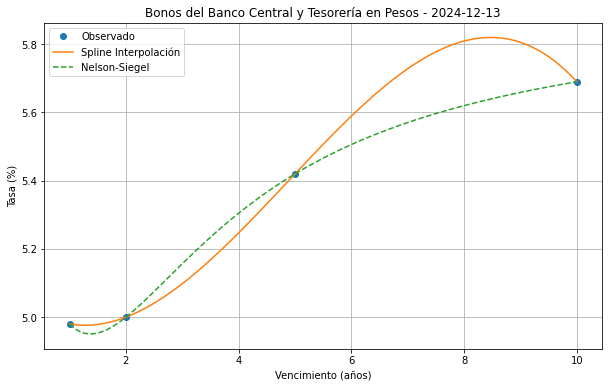

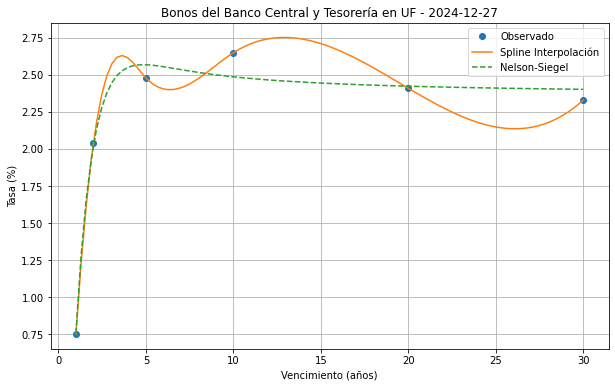